In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
plt.style.use('seaborn')

## Load Datasets

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2022-03-10 02:56:07--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2022-03-10 02:56:07 (17.0 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [ ]:
!ls

pima_diabetes.csv  pima-indians-diabetes.data.csv  sample_data


In [ ]:
df_diabetes = pd.read_csv('pima-indians-diabetes.data.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


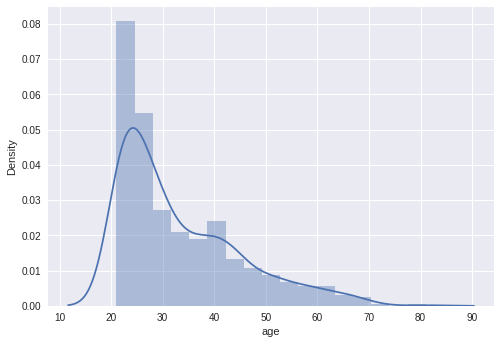

In [ ]:
sns.distplot(df_diabetes['age'])

In [ ]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split Datasets

In [ ]:
features = df_diabetes.values[:,:8]     # values[range baris, range kolom]

In [ ]:
labels = df_diabetes['class']

In [ ]:
label = df_diabetes.values[:,8:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=20)

In [ ]:
print('Jumlah data train :', X_train.shape)
print('Jumlah data test :', X_test.shape)
print('Jumlah label train :', y_train.shape)
print('Jumlah label test :', y_test.shape)

Jumlah data train : (614, 8)
Jumlah data test : (154, 8)
Jumlah label train : (614, 1)
Jumlah label test : (154, 1)


## Define Model

In [ ]:
# define the keras sequential model
model = Sequential()

In [ ]:
model.add(Dense(16, input_dim=8, activation='relu'))      # Dense (unit = bobotnya, input_dimension)
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))                    # Dense (unit = output hidden layer) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))                 # Dense (unit = output layer)

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 16)                144       
                                                                 
 dense_86 (Dense)            (None, 32)                544       
                                                                 
 dense_87 (Dense)            (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_88 (Dense)            (None, 8)                 520       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_89 (Dense)            (None, 1)               

## Compile Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, validation_data= (X_test,y_test) ,epochs=300, batch_size=8)

Epoch 1/300
77/77 [==============================] - 1s 8ms/step - loss: 1.5052 - accuracy: 0.5407 - val_loss: 0.7101 - val_accuracy: 0.6169
Epoch 2/300
77/77 [==============================] - 0s 6ms/step - loss: 0.6791 - accuracy: 0.6336 - val_loss: 0.7068 - val_accuracy: 0.6169
Epoch 3/300
77/77 [==============================] - 1s 7ms/step - loss: 0.7090 - accuracy: 0.6564 - val_loss: 0.6741 - val_accuracy: 0.6299
Epoch 4/300
77/77 [==============================] - 0s 6ms/step - loss: 0.6637 - accuracy: 0.6612 - val_loss: 0.6659 - val_accuracy: 0.6299
Epoch 5/300
77/77 [==============================] - 0s 6ms/step - loss: 0.6722 - accuracy: 0.6547 - val_loss: 0.6685 - val_accuracy: 0.6234
Epoch 6/300
77/77 [==============================] - 0s 6ms/step - loss: 0.6573 - accuracy: 0.6515 - val_loss: 0.6656 - val_accuracy: 0.6429
Epoch 7/300
77/77 [==============================] - 0s 6ms/step - loss: 0.6517 - accuracy: 0.6564 - val_loss: 0.6532 - val_accuracy: 0.6558
Epoch 8/300
7

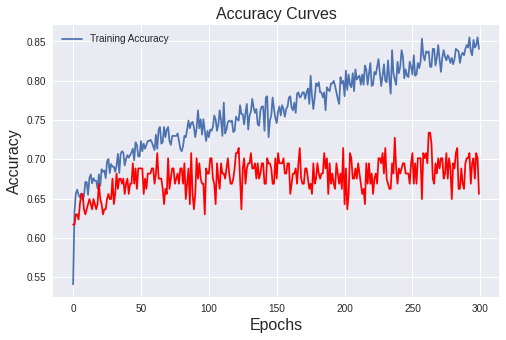

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'],'r')
plt.legend(['Training Accuracy'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 65.58
